In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

In [2]:
df_after_drop = pd.read_csv("data/after_drop.csv")
df_after_drop.drop(columns =['Unnamed: 0'], axis = 1, inplace = True)
df_after_drop.head(1000)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2.667697,2078.894676,1542.168458,132.147403,22.650109,357.972896,787.299217,76.471788,2559.643047,163.902778,90.0,10.000000,70.000000
1,3.034399,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,75.090372,2848.490078,311.052398,0.0,7.856167,64.301964
2,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,66.420794,2868.586527,227.022557,0.0,7.401543,19.250533
3,2.664389,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,69.489773,2220.587445,314.776669,0.0,6.675780,78.623299
4,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0.0,7.526398,38.176975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
980,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
981,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
982,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [3]:
count_3s = 0
for column in df_after_drop:
    d = df_after_drop.loc[ :, [column]]
    zscore = (df_after_drop[column] - df_after_drop[column].mean()) / df_after_drop[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
print('Метод 3-х сигм, выбросов: ', count_3s)

Метод 3-х сигм, выбросов:  21


In [4]:
count_iq = 0
for column in df_after_drop:
    d = df_after_drop.loc[ :, [column]]
    q1 = np.quantile(df_after_drop[column], 0.25)
    q3 = np.quantile(df_after_drop[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df_after_drop[column] <= lower) | (df_after_drop[column] >= upper)
    count_iq += d['iq'].sum()
print('Метод межквартильных расстояний: ', count_iq)

Метод межквартильных расстояний:  88


In [9]:
df_after_drop

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2.667697,2078.894676,1542.168458,132.147403,22.650109,357.972896,787.299217,76.471788,2559.643047,163.902778,90.0,10.000000,70.000000
1,3.034399,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,75.090372,2848.490078,311.052398,0.0,7.856167,64.301964
2,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,66.420794,2868.586527,227.022557,0.0,7.401543,19.250533
3,2.664389,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,69.489773,2220.587445,314.776669,0.0,6.675780,78.623299
4,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0.0,7.526398,38.176975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
980,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
981,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
982,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [5]:
df_new1 = df_after_drop[(df_after_drop[column] <= lower) | (df_after_drop[column] >= upper)]
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2 to 469
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       20 non-null     float64
 1   Плотность, кг/м3                      20 non-null     float64
 2   модуль упругости, ГПа                 20 non-null     float64
 3   Количество отвердителя, м.%           20 non-null     float64
 4   Содержание эпоксидных групп,%_2       20 non-null     float64
 5   Температура вспышки, С_2              20 non-null     float64
 6   Поверхностная плотность, г/м2         20 non-null     float64
 7   Модуль упругости при растяжении, ГПа  20 non-null     float64
 8   Прочность при растяжении, МПа         20 non-null     float64
 9   Потребление смолы, г/м2               20 non-null     float64
 10  Угол нашивки, град                    20 non-null     float64
 11  Шаг нашивки         

<AxesSubplot:>

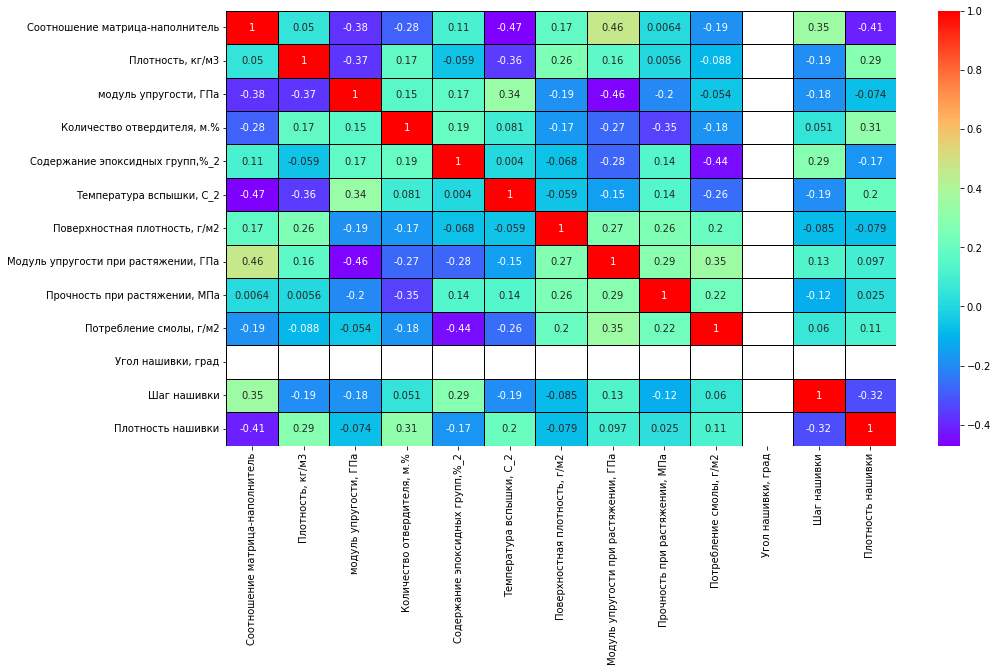

In [6]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_new1.corr(), cmap = 'rainbow', annot = True, linewidths = 1, linecolor = 'black')

In [7]:
df_new2 = df_after_drop[(np.abs(stats.zscore(df_after_drop)) <= 3).all(axis = 1)]
df_new2

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2.667697,2078.894676,1542.168458,132.147403,22.650109,357.972896,787.299217,76.471788,2559.643047,163.902778,90.0,10.000000,70.000000
1,3.034399,1968.401388,455.871019,61.421297,23.490723,316.414572,637.376893,75.090372,2848.490078,311.052398,0.0,7.856167,64.301964
3,2.664389,1996.159145,525.057774,77.506883,18.126107,223.408685,28.658102,69.489773,2220.587445,314.776669,0.0,6.675780,78.623299
4,1.193530,1965.929227,899.603701,102.959069,19.566716,225.810223,871.088955,73.454695,2335.541792,91.047646,0.0,7.526398,38.176975
5,2.914333,2049.373404,382.263359,81.352047,16.391595,233.296063,561.992131,69.814615,2262.784366,303.075452,0.0,8.325699,46.045428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
980,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
981,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
982,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


<AxesSubplot:>

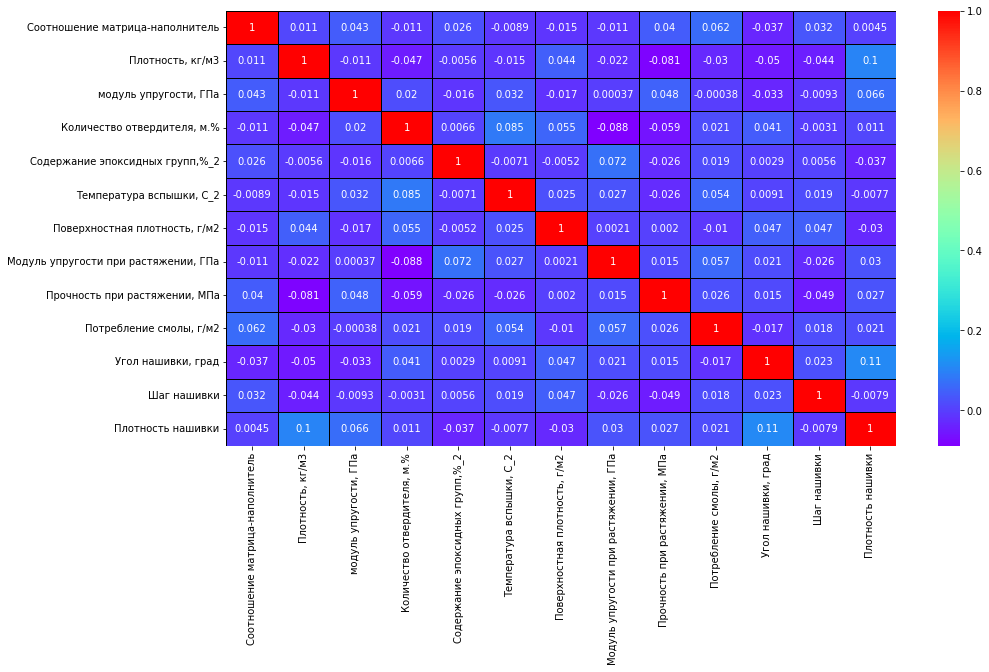

In [8]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_new2.corr(), cmap = 'rainbow', annot = True, linewidths = 1, linecolor = 'black')